In [1]:
from rustworkx.visualization import mpl_draw as draw_graph
from graphs_utils import generate_random_complete_graph, generate_k_regular_graph,build_max_cut_paulis
from qiskit.quantum_info import SparsePauliOp
from circuit_utils import multi_angle_qaoa_circuit
from qiskit.circuit import Parameter,ParameterExpression

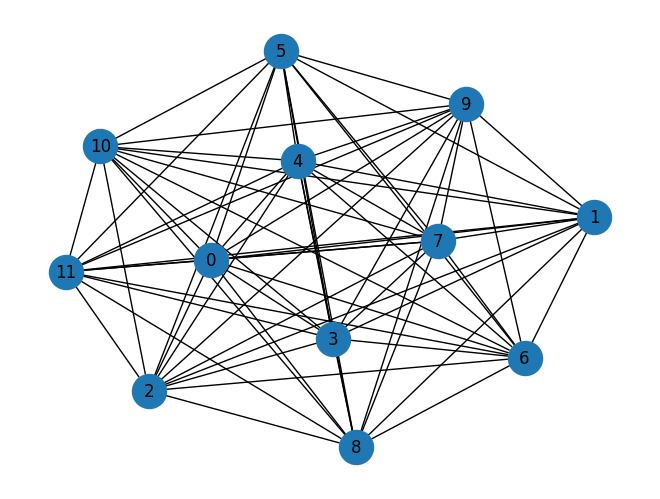

In [2]:
# Generate a graph given 'n' nodes. Can be weighted if needed.
n = 12
G=generate_random_complete_graph(num_vertices=n, weighted=True, seed=True)

## To generate k-reg graphs
# k=3
# G = generate_k_regular_graph(num_vertices=n, k=k, weighted=True,seed=True)

draw_graph(G, node_size=600, with_labels=True)


In [3]:
# Build MaxCut formulation Hamiltonian from graph.
max_cut_paulis = build_max_cut_paulis(G)
cost_hamiltonian = SparsePauliOp.from_list(max_cut_paulis)

print("Cost Function Hamiltonian:", cost_hamiltonian)
paulis,coeffs = cost_hamiltonian.paulis.to_labels(),cost_hamiltonian.coeffs.real

Cost Function Hamiltonian: SparsePauliOp(['IIIIIIIIIIZZ', 'IIIIIIIIIZIZ', 'IIIIIIIIZIIZ', 'IIIIIIIZIIIZ', 'IIIIIIZIIIIZ', 'IIIIIZIIIIIZ', 'IIIIZIIIIIIZ', 'IIIZIIIIIIIZ', 'IIZIIIIIIIIZ', 'IZIIIIIIIIIZ', 'ZIIIIIIIIIIZ', 'IIIIIIIIIZZI', 'IIIIIIIIZIZI', 'IIIIIIIZIIZI', 'IIIIIIZIIIZI', 'IIIIIZIIIIZI', 'IIIIZIIIIIZI', 'IIIZIIIIIIZI', 'IIZIIIIIIIZI', 'IZIIIIIIIIZI', 'ZIIIIIIIIIZI', 'IIIIIIIIZZII', 'IIIIIIIZIZII', 'IIIIIIZIIZII', 'IIIIIZIIIZII', 'IIIIZIIIIZII', 'IIIZIIIIIZII', 'IIZIIIIIIZII', 'IZIIIIIIIZII', 'ZIIIIIIIIZII', 'IIIIIIIZZIII', 'IIIIIIZIZIII', 'IIIIIZIIZIII', 'IIIIZIIIZIII', 'IIIZIIIIZIII', 'IIZIIIIIZIII', 'IZIIIIIIZIII', 'ZIIIIIIIZIII', 'IIIIIIZZIIII', 'IIIIIZIZIIII', 'IIIIZIIZIIII', 'IIIZIIIZIIII', 'IIZIIIIZIIII', 'IZIIIIIZIIII', 'ZIIIIIIZIIII', 'IIIIIZZIIIII', 'IIIIZIZIIIII', 'IIIZIIZIIIII', 'IIZIIIZIIIII', 'IZIIIIZIIIII', 'ZIIIIIZIIIII', 'IIIIZZIIIIII', 'IIIZIZIIIIII', 'IIZIIZIIIIII', 'IZIIIZIIIIII', 'ZIIIIZIIIIII', 'IIIZZIIIIIII', 'IIZIZIIIIIII', 'IZIIZIIIIIII', 'ZIIIZIIIIIII'

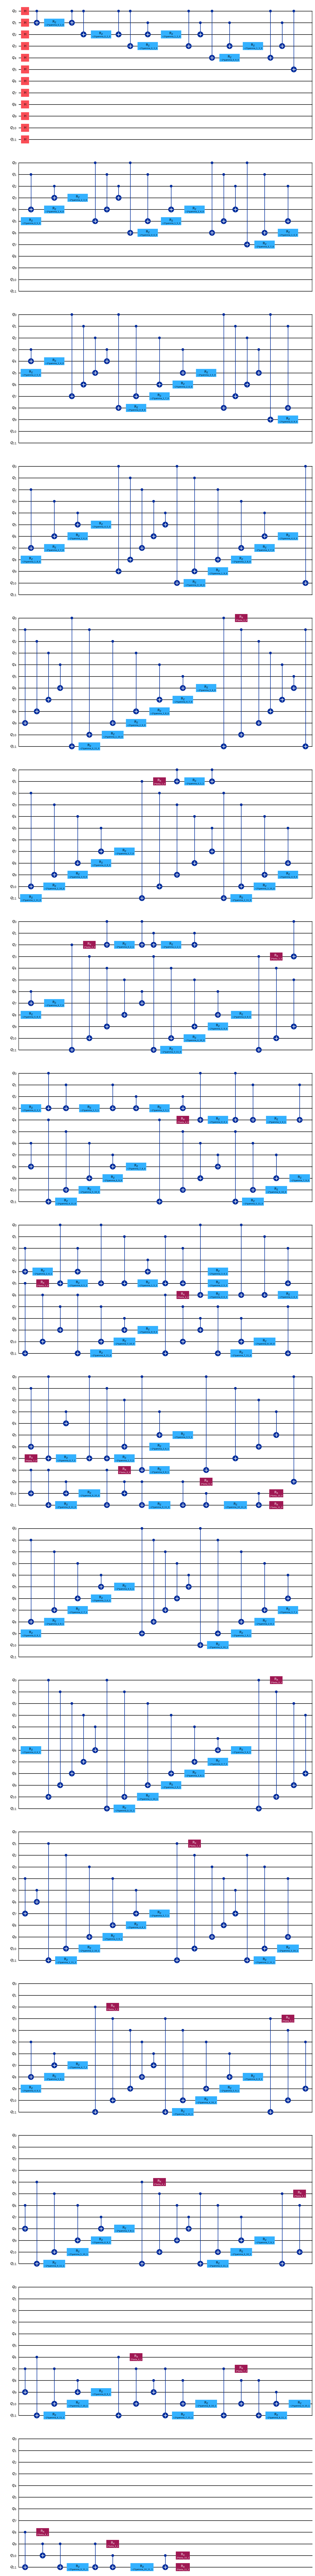

In [ ]:
# Create ma-QAOA ansatz from Graph. Number of layers can be specified and advised to keep it >1.
reps = 2
gamma_params = [Parameter(f'gamma_{i}_{j}_{r}') for r in range(reps) for i, j in G.edge_list()]
beta_params = [Parameter(f'beta_{i}_{r}') for r in range(reps) for i in G.node_indexes()]

circuit = multi_angle_qaoa_circuit(gamma_params,beta_params,n,G ,reps)
# circuit.draw('mpl')

##  To create 'n' MaxCut hamiltonians with Ansatz. 

In [ ]:
# Create 10 isomorphic graphs with different weights and get one ansatz.
MaxCut_Hamiltonians = []
MaxCut_Graphs = []
n = 12

for i in range(10):
    G = generate_random_complete_graph(num_vertices=n, weighted=True, seed=False) # Set seed to `False` to generate different weights. 
    max_cut_paulis = build_max_cut_paulis(G)
    cost_hamiltonian = SparsePauliOp.from_list(max_cut_paulis)
    MaxCut_Hamiltonians.append(cost_hamiltonian)
    MaxCut_Graphs.append(G)

maxcut_ansatz = multi_angle_qaoa_circuit(gamma_params,beta_params,n,MaxCut_Graphs[0] ,reps)

[SparsePauliOp(['IIIIIIIIIIZZ', 'IIIIIIIIIZIZ', 'IIIIIIIIZIIZ', 'IIIIIIIZIIIZ', 'IIIIIIZIIIIZ', 'IIIIIZIIIIIZ', 'IIIIZIIIIIIZ', 'IIIZIIIIIIIZ', 'IIZIIIIIIIIZ', 'IZIIIIIIIIIZ', 'ZIIIIIIIIIIZ', 'IIIIIIIIIZZI', 'IIIIIIIIZIZI', 'IIIIIIIZIIZI', 'IIIIIIZIIIZI', 'IIIIIZIIIIZI', 'IIIIZIIIIIZI', 'IIIZIIIIIIZI', 'IIZIIIIIIIZI', 'IZIIIIIIIIZI', 'ZIIIIIIIIIZI', 'IIIIIIIIZZII', 'IIIIIIIZIZII', 'IIIIIIZIIZII', 'IIIIIZIIIZII', 'IIIIZIIIIZII', 'IIIZIIIIIZII', 'IIZIIIIIIZII', 'IZIIIIIIIZII', 'ZIIIIIIIIZII', 'IIIIIIIZZIII', 'IIIIIIZIZIII', 'IIIIIZIIZIII', 'IIIIZIIIZIII', 'IIIZIIIIZIII', 'IIZIIIIIZIII', 'IZIIIIIIZIII', 'ZIIIIIIIZIII', 'IIIIIIZZIIII', 'IIIIIZIZIIII', 'IIIIZIIZIIII', 'IIIZIIIZIIII', 'IIZIIIIZIIII', 'IZIIIIIZIIII', 'ZIIIIIIZIIII', 'IIIIIZZIIIII', 'IIIIZIZIIIII', 'IIIZIIZIIIII', 'IIZIIIZIIIII', 'IZIIIIZIIIII', 'ZIIIIIZIIIII', 'IIIIZZIIIIII', 'IIIZIZIIIIII', 'IIZIIZIIIIII', 'IZIIIZIIIIII', 'ZIIIIZIIIIII', 'IIIZZIIIIIII', 'IIZIZIIIIIII', 'IZIIZIIIIIII', 'ZIIIZIIIIIII', 'IIZZIIIIIIII', 'IZIZIII